# PROGRAM-1

# Implement A* Searchalgorithm

In [1]:
class Graph:
    def __init__(self, adjac_lis):
        self.adjac_lis = adjac_lis

    def get_neighbours(self, v):
        return self.adjac_lis[v]

    def h(self, n):
        H = {'A': 1, 'B': 1, 'C': 1, 'D': 1}
        return H[n]

    def a_star_algorithm(self, start, stop):
        open_lst = set([start])
        closed_lst = set([])
        dist = {}
        dist[start] = 0
        prenode = {}
        prenode[start] = start

        while len(open_lst) > 0:
            n = None
            for v in open_lst:
                if n == None or dist[v] + self.h(v) < dist[n] + self.h(n):
                    n = v

            if n == None:
                print("Path does not exist")
                return None

            if n == stop:
                reconst_path = []
                while prenode[n] != n:
                    reconst_path.append(n)
                    n = prenode[n]
                reconst_path.append(start)
                reconst_path.reverse()
                print("Path found: {}".format(reconst_path))
                return reconst_path

            for (m, weight) in self.get_neighbours(n):
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    prenode[m] = n
                    dist[m] = dist[n] + weight
                else:
                    if dist[m] > dist[n] + weight:
                        dist[m] = dist[n] + weight
                        prenode[m] = n
                        if m in closed_lst:
                            closed_lst.remove(m)
                        open_lst.add(m)
            open_lst.remove(n)
            closed_lst.add(n)

        print("Path does not exist")
        return None

adjac_lis = {'A': [('B', 1), ('C', 3), ('D', 7)], 'B': [('D', 5)], 'C': [('D', 12)]}
graph1 = Graph(adjac_lis)
graph1.a_star_algorithm('A', 'D')

Path found: ['A', 'B', 'D']


['A', 'B', 'D']

# PROGRAM-2
#Implement AO* Algorithm

In [2]:
def recAOStar(n):
    global finalPath
    print("Expanding Node:", n)
    and_nodes = []
    or_nodes = []
    if (n in allNodes):
        if 'AND' in allNodes[n]:
            and_nodes = allNodes[n]['AND']
        if 'OR' in allNodes[n]:
            or_nodes = allNodes[n]['OR']
    if len(and_nodes) == 0 and len(or_nodes) == 0:
        return
    solvable = False
    marked = {}
    while not solvable:
        if len(marked)==len(and_nodes)+len(or_nodes):
            min_cost_least,min_cost_group_least = least_cost_group(and_nodes,or_nodes,{})
            solvable = True
            change_heuristic(n,min_cost_least)
            optimal_child_group[n] = min_cost_group_least
            continue
        min_cost,min_cost_group = least_cost_group(and_nodes,or_nodes,marked)
        is_expanded = False
        if len(min_cost_group) > 1:
            if min_cost_group[0] in allNodes:
                is_expanded = True
                recAOStar(min_cost_group[0])
            if min_cost_group[1] in allNodes:
                is_expanded = True
                recAOStar(min_cost_group[1])
        else:
            if min_cost_group in allNodes:
                is_expanded = True
                recAOStar(min_cost_group)
        if is_expanded:
            min_cost_verify, min_cost_group_verify = least_cost_group(and_nodes, or_nodes, {})
            if min_cost_group == min_cost_group_verify:
                solvable = True
                change_heuristic(n, min_cost_verify)
                optimal_child_group[n] = min_cost_group
        else:
                solvable = True
                change_heuristic(n, min_cost)
                optimal_child_group[n] = min_cost_group
        marked[min_cost_group] = 1
    return heuristic(n)


def least_cost_group(and_nodes, or_nodes, marked):
    node_wise_cost = {}
    for node_pair in and_nodes:
        if not node_pair[0] + node_pair[1] in marked:
            cost = 0
            cost = cost + heuristic(node_pair[0]) + heuristic(node_pair[1]) + 2
            node_wise_cost[node_pair[0] + node_pair[1]] = cost
    for node in or_nodes:
        if not node in marked:
            cost = 0
            cost = cost + heuristic(node) + 1
            node_wise_cost[node] = cost
    min_cost = 999999
    min_cost_group = None
    for costKey in node_wise_cost:
        if node_wise_cost[costKey] < min_cost:
            min_cost = node_wise_cost[costKey]
            min_cost_group = costKey
    return [min_cost, min_cost_group]


def heuristic(n):
    return H_dist[n]


def change_heuristic(n, cost):
    H_dist[n] = cost
    return


def print_path(node):
    print(optimal_child_group[node], end="")
    node = optimal_child_group[node]
    if len(node) > 1:
        if node[0] in optimal_child_group:
            print("->", end="")
            print_path(node[0])
        if node[1] in optimal_child_group:
            print("->", end="")
            print_path(node[1])
    else:
        if node in optimal_child_group:
            print("->", end="")
            print_path(node)


H_dist = {
    'A': -1,
    'B': 4,
    'C': 2,
    'D': 3,
    'E': 6,
    'F': 8,
    'G': 2,
    'H': 0,
    'I': 0,
    'J': 0
}

allNodes = {
    'A': {'AND': [('C', 'D')], 'OR': ['B']},
    'B': {'OR': ['E', 'F']},
    'C': {'OR': ['G'], 'AND': [('H', 'I')]},
    'D': {'OR': ['J']}
}

optimal_child_group = {}
optimal_cost = recAOStar('A')
print('Nodes which give the optimal cost are:')
print_path('A')
print('\nOptimal Cost is::', optimal_cost)

Expanding Node: A
Expanding Node: B
Expanding Node: C
Expanding Node: D
Nodes which give the optimal cost are:
CD->HI->J
Optimal Cost is:: 5


PROGRAM-3
For a given set of training data examples stored in a .CSV file, implement and
demonstrate the Candidate-Elimination algorithm to output a description of
the set of all hypotheses consistent with the training examples.

In [3]:
import numpy as np
import pandas as pd

data = pd.DataFrame(data=pd.read_csv('finds.csv'))
concepts = np.array(data.iloc[:, 0:-1])
target = np.array(data.iloc[:, -1])

def learn(concepts, target):
    specific_h = concepts[0].copy()
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    for i, h in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
        if target[i] == "No":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h

s_final, g_final = learn(concepts, target)
print("Final S:", s_final, sep="\n")
print("Final G:", g_final, sep="\n")

Final S:
['sunny' 'warm' '?' 'strong' '?' '?']
Final G:
[['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?']]


PROGRAM-4
Write a program to demonstrate the working of the decision tree based ID3
algorithm. Use an appropriate data set for building the decision tree and
apply this knowledge to classify a new sample.

In [ ]:
from pprint import pprint
import pandas as pd
from pandas import DataFrame

# df_tennis = DataFrame.from_csv('PlayTennis.csv')
df_tennis = pd.read_csv('PlayTennis.csv')



# print(df_tennis)

# Calculate the Entropy of given probability
def entropy(probs):
    import math
    return sum([-prob * math.log(prob, 2) for prob in probs])


def entropy_of_list(a_list):  # Entropy calculation of list of discrete val ues(YES / NO)
    from collections import Counter
    cnt = Counter(x for x in a_list)
    print("No and Yes Classes:", a_list.name, cnt)
    num_instances = len(a_list) * 1.0
    probs = [x / num_instances for x in cnt.values()]
    return entropy(probs)  # Call Entropy:


# The initial entropy of the YES/NO attribute for our dataset.
# print(df_tennis['PlayTennis'])
total_entropy = entropy_of_list(df_tennis['PlayTennis'])
print("Entropy of given PlayTennis Data Set:", total_entropy)


def information_gain(df, split_attribute_name, target_attribute_name, trace=0):
    print("Information Gain Calculation of ", split_attribute_name)
    df_split = df.groupby(split_attribute_name)
    '''
 Takes a DataFrame of attributes,and quantifies the entropy of a target
 attribute after performing a split along the values of another attribute.
 '''  # print(df_split.groups)
    for name, group in df_split:
        print(name)
        # print(group)
    # Calculate Entropy for Target Attribute, as well as
    # Proportion of Obs in Each Data-Split
    nobs = len(df.index) * 1.0
    # print("NOBS",nobs)
    df_agg_ent = df_split.agg({target_attribute_name: [entropy_of_list, lambda x: len(x) / nobs]})[
        target_attribute_name]
    # print("FAGGED",df_agg_ent)
    df_agg_ent.columns = ['Entropy', 'PropObservations']
    # if traced: # helps understand what fxn is doing:
    # Calculate Information Gain:
    new_entropy = sum(df_agg_ent['Entropy'] * df_agg_ent['PropObservations'])
    old_entropy = entropy_of_list(df[target_attribute_name])
    return old_entropy - new_entropy


print('Info-gain for Outlook is :'+str( information_gain(df_tennis, 'Outlook', 'PlayTennis')),"\n")
print('\n Info-gain for Humidity is: ' + str( information_gain(df_tennis,'Humidity', 'PlayTennis')),"\n")
print('\n Info-gain for Wind is:' + str( information_gain(df_tennis, 'Wind', 'PlayTennis')),"\n")
print('\n Info-gain for Temperature is:' + str( information_gain(df_tennis, 'Temperature','PlayTennis')),"\n")


def id3(df, target_attribute_name, attribute_names, default_class=None):  # Tally target attribute
    from collections import Counter
    cnt = Counter(x for x in df[target_attribute_name])  # class of YES /NO
    # First check: Is this split of the dataset homogeneous?
    if len(cnt) == 1:
        return next(iter(cnt))
    # Second check: Is this split of the dataset empty?
    # if yes, return a default value
    elif df.empty or (not attribute_names):
        return default_class
        # Otherwise: This dataset is ready to be divvied up!
    else:
        # [index_of_max] # most common value  of  target  attribute in dataset
        default_class = max(cnt.keys())
        # Choose Best Attribute to split on:
        gainz = [information_gain(df, attr, target_attribute_name)
                 for attr in attribute_names]
        index_of_max = gainz.index(max(gainz))
        best_attr = attribute_names[index_of_max]
        # Create an empty tree, to be populated in a moment
        tree = {best_attr: {}}
        remaining_attribute_names = [
            i for i in attribute_names if i != best_attr]
        # Split dataset
        # On each split, recursively call this algorithm.
        # populate the empty tree with subtrees, which
        # are the result of the recursive call
        for attr_val, data_subset in df.groupby(best_attr):
            subtree = id3(data_subset, target_attribute_name,
                          remaining_attribute_names, default_class)
            tree[best_attr][attr_val] = subtree
        return tree


# Predicting Attributes
attribute_names = list(df_tennis.columns)
print("List of Attributes:", attribute_names)
attribute_names.remove('PlayTennis')  # Remove the class attribute
print("Predicting Attributes:", attribute_names)

# Tree Construction

tree = id3(df_tennis, 'PlayTennis', attribute_names)
print("\n\nThe Resultant Decision Tree is :\n")
pprint(tree)

In [ ]:
[Running] python -u "c:\Users\dipus\Downloads\lab\lab\lab4.py"
No and Yes Classes: PlayTennis Counter({'Yes': 9, 'No': 5})
Entropy of given PlayTennis Data Set: 0.9402859586706309
Information Gain Calculation of  Outlook
Overcast
Rain
Sunny
No and Yes Classes: PlayTennis Counter({'Yes': 4})
No and Yes Classes: PlayTennis Counter({'Yes': 3, 'No': 2})
No and Yes Classes: PlayTennis Counter({'No': 3, 'Yes': 2})
No and Yes Classes: PlayTennis Counter({'Yes': 9, 'No': 5})
Info-gain for Outlook is :0.2467498197744391 

Information Gain Calculation of  Humidity
High
Normal
No and Yes Classes: PlayTennis Counter({'No': 4, 'Yes': 3})
No and Yes Classes: PlayTennis Counter({'Yes': 6, 'No': 1})
No and Yes Classes: PlayTennis Counter({'Yes': 9, 'No': 5})

 Info-gain for Humidity is: 0.15183550136234136 

Information Gain Calculation of  Wind
Strong
Weak
No and Yes Classes: PlayTennis Counter({'No': 3, 'Yes': 3})
No and Yes Classes: PlayTennis Counter({'Yes': 6, 'No': 2})
No and Yes Classes: PlayTennis Counter({'Yes': 9, 'No': 5})

 Info-gain for Wind is:0.04812703040826927 

Information Gain Calculation of  Temperature
Cool
Hot
Mild
No and Yes Classes: PlayTennis Counter({'Yes': 3, 'No': 1})
No and Yes Classes: PlayTennis Counter({'No': 2, 'Yes': 2})
No and Yes Classes: PlayTennis Counter({'Yes': 4, 'No': 2})
No and Yes Classes: PlayTennis Counter({'Yes': 9, 'No': 5})

 Info-gain for Temperature is:0.029222565658954647 

List of Attributes: ['PlayTennis', 'Outlook', 'Temperature', 'Humidity', 'Wind']
Predicting Attributes: ['Outlook', 'Temperature', 'Humidity', 'Wind']
Information Gain Calculation of  Outlook
Overcast
Rain
Sunny
No and Yes Classes: PlayTennis Counter({'Yes': 4})
No and Yes Classes: PlayTennis Counter({'Yes': 3, 'No': 2})
No and Yes Classes: PlayTennis Counter({'No': 3, 'Yes': 2})
No and Yes Classes: PlayTennis Counter({'Yes': 9, 'No': 5})
Information Gain Calculation of  Temperature
Cool
Hot
Mild
No and Yes Classes: PlayTennis Counter({'Yes': 3, 'No': 1})
No and Yes Classes: PlayTennis Counter({'No': 2, 'Yes': 2})
No and Yes Classes: PlayTennis Counter({'Yes': 4, 'No': 2})
No and Yes Classes: PlayTennis Counter({'Yes': 9, 'No': 5})
Information Gain Calculation of  Humidity
High
Normal
No and Yes Classes: PlayTennis Counter({'No': 4, 'Yes': 3})
No and Yes Classes: PlayTennis Counter({'Yes': 6, 'No': 1})
No and Yes Classes: PlayTennis Counter({'Yes': 9, 'No': 5})
Information Gain Calculation of  Wind
Strong
Weak
No and Yes Classes: PlayTennis Counter({'No': 3, 'Yes': 3})
No and Yes Classes: PlayTennis Counter({'Yes': 6, 'No': 2})
No and Yes Classes: PlayTennis Counter({'Yes': 9, 'No': 5})
Information Gain Calculation of  Temperature
Cool
Mild
No and Yes Classes: PlayTennis Counter({'Yes': 1, 'No': 1})
No and Yes Classes: PlayTennis Counter({'Yes': 2, 'No': 1})
No and Yes Classes: PlayTennis Counter({'Yes': 3, 'No': 2})
Information Gain Calculation of  Humidity
High
Normal
No and Yes Classes: PlayTennis Counter({'Yes': 1, 'No': 1})
No and Yes Classes: PlayTennis Counter({'Yes': 2, 'No': 1})
No and Yes Classes: PlayTennis Counter({'Yes': 3, 'No': 2})
Information Gain Calculation of  Wind
Strong
Weak
No and Yes Classes: PlayTennis Counter({'No': 2})
No and Yes Classes: PlayTennis Counter({'Yes': 3})
No and Yes Classes: PlayTennis Counter({'Yes': 3, 'No': 2})
Information Gain Calculation of  Temperature
Cool
Hot
Mild
No and Yes Classes: PlayTennis Counter({'Yes': 1})
No and Yes Classes: PlayTennis Counter({'No': 2})
No and Yes Classes: PlayTennis Counter({'No': 1, 'Yes': 1})
No and Yes Classes: PlayTennis Counter({'No': 3, 'Yes': 2})
Information Gain Calculation of  Humidity
High
Normal
No and Yes Classes: PlayTennis Counter({'No': 3})
No and Yes Classes: PlayTennis Counter({'Yes': 2})
No and Yes Classes: PlayTennis Counter({'No': 3, 'Yes': 2})
Information Gain Calculation of  Wind
Strong
Weak
No and Yes Classes: PlayTennis Counter({'No': 1, 'Yes': 1})
No and Yes Classes: PlayTennis Counter({'No': 2, 'Yes': 1})
No and Yes Classes: PlayTennis Counter({'No': 3, 'Yes': 2})


The Resultant Decision Tree is :

{'Outlook': {'Overcast': 'Yes',
             'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}},
             'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}

[Done] exited with code=0 in 0.602 seconds

PROGRAM-5
Build an Artificial Neural Network by implementing the Back propagation
algorithm and test the same using appropriate data sets

In [8]:
import numpy as np

X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X / np.amax(X, axis=0)  # maximum of X array longitudinally
y = y / 100


# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)


# Variable initialization
epoch = 7000  # Setting training iterations
lr = 0.1  # Setting learning rate
inputlayer_neurons = 2  # number of features in data set
hiddenlayer_neurons = 3  # number of hidden layers neurons
output_neurons = 1  # number of neurons at output layer
# weight and bias initialization
wh = np.random.uniform(size=(inputlayer_neurons, hiddenlayer_neurons))
bh = np.random.uniform(size=(1, hiddenlayer_neurons))
wout = np.random.uniform(size=(hiddenlayer_neurons, output_neurons))
bout = np.random.uniform(size=(1, output_neurons))
# draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
    # Forward Propogation
    hinp1 = np.dot(X, wh)
    hinp = hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1 = np.dot(hlayer_act, wout)
    outinp = outinp1 + bout
    output = sigmoid(outinp)
    # Backpropagation
    EO = y - output
    outgrad = derivatives_sigmoid(output)
    d_output = EO * outgrad
    EH = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(hlayer_act)
    d_hiddenlayer = EH * hiddengrad
    wout += hlayer_act.T.dot(d_output) * lr
    # bout += np.sum(d_output, axis=0,keepdims=True) *lr
    wh += X.T.dot(d_hiddenlayer) * lr
    # bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n", output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89401229]
 [0.87864253]
 [0.89698433]]


PROGRAM-6
Write a program to implement the naïve Bayesian classifier for a sample
training data set stored as a .CSV file. Compute the accuracy of the classifier,
considering few test data sets

In [ ]:
import csv
import random
import math

def loadcsv(filename):
    dataset = list(csv.reader(open(filename,"r")))
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    trainSet,testSet = dataset[:trainSize],dataset[trainSize:]
    return [trainSet, testSet]

def mean(numbers):
    return sum(numbers)/(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    v = 0
    for x in numbers:
        v += (x-avg)**2
    return math.sqrt(v/(len(numbers)-1))

def summarizeByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = [(mean(attribute), stdev(attribute)) for attribute in zip(*instances)][:-1]
    return summaries

def calculateProbability(x, mean, stdev):
    exponent = math.exp((-(x-mean)**2)/(2*(stdev**2)))
    return (1 / math.sqrt(2*math.pi*(stdev**2))) * exponent

def predict(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct/(len(testSet))) * 100.0

filename = 'diabetes2.csv'
splitRatio = 0.67
dataset = loadcsv(filename)
actual = []
trainingSet, testSet = splitDataset(dataset, splitRatio)
for i in range(len(testSet)):
	vector = testSet[i]
	actual.append(vector[-1])
print('Split {0} rows into train={1} and test={2} rows'.format(len(dataset), len(trainingSet), len(testSet)))
summaries = summarizeByClass(trainingSet) #will have (mean,sd) for all attributes.(for class 1 & 0 separately)
predictions = getPredictions(summaries, testSet)
# print('\nActual values:\n',actual)
# print("\nPredictions:\n",predictions)
accuracy = getAccuracy(testSet, predictions)
print("Accuracy",accuracy)

In [ ]:
"c:\Users\dipus\Downloads\lab\lab\lab6.py"
Split 768 rows into train=514 and test=254 rows
Accuracy 76.77165354330708

[Done] exited with code=0 in 0.084 seconds

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
     Targets
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


C:\Users\dipus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dipus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


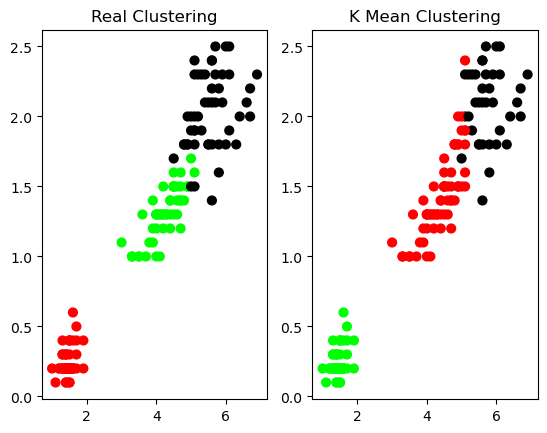

C:\Users\dipus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


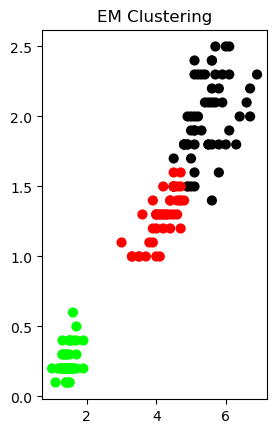

Actual Target is:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
K Means:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
EM:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Accuracy of KMeans is  0.24
Accuracy of EM is  0

In [10]:
"""7  Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using
k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add
Java/Python ML library classes/API in the program """

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture 
import sklearn.metrics as sm
import pandas as pd
import numpy as np

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
Y = pd.DataFrame(iris.target)
Y.columns = ['Targets']

print(X)
print(Y)
colormap = np.array(['red', 'lime', 'black'])

plt.subplot(1,2,1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[Y.Targets], s=40)
plt.title('Real Clustering')

model1 = KMeans(n_clusters=3)
model1.fit(X)

plt.subplot(1,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model1.labels_], s=40)
plt.title('K Mean Clustering')
plt.show()

model2 = GaussianMixture(n_components=3) 
model2.fit(X)

plt.subplot(1,2,1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model2.predict(X)], s=40)
plt.title('EM Clustering')
plt.show()

print("Actual Target is:\n", iris.target)
print("K Means:\n",model1.labels_)
print("EM:\n",model2.predict(X))
print("Accuracy of KMeans is ",sm.accuracy_score(Y,model1.labels_))
print("Accuracy of EM is ",sm.accuracy_score(Y, model2.predict(X)))

In [ ]:
PROGRAM-8
Write a program to implement k-Nearest Neighbour algorithm to classify the
iris data set. Print both correct and wrong predictions. Java/Python ML
library classes can be used for this problem.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
iris=datasets.load_iris() 
print("Iris Data set loaded...")
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1) 
print("Dataset is split into training and testing...")
print("Size of trainng data and its label",x_train.shape,y_train.shape)
print("Size of trainng data and its label",x_test.shape, y_test.shape) 
for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i])) 
classifier = KNeighborsClassifier(n_neighbors=5) 
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print("Results of Classification using K-nn with K=5 ") 
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r]), "Predicted-label:", str(y_pred[r])) 
print("Classification Accuracy :" ,classifier.score(x_test,y_test))

Iris Data set loaded...
Dataset is split into training and testing...
Size of trainng data and its label (135, 4) (135,)
Size of trainng data and its label (15, 4) (15,)
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=5 
 Sample: [5.8 4.  1.2 0.2]  Actual-label: 0 Predicted-label: 0
 Sample: [6.  3.4 4.5 1.6]  Actual-label: 1 Predicted-label: 1
 Sample: [5.1 3.7 1.5 0.4]  Actual-label: 0 Predicted-label: 0
 Sample: [5.1 2.5 3.  1.1]  Actual-label: 1 Predicted-label: 1
 Sample: [6.9 3.1 5.1 2.3]  Actual-label: 2 Predicted-label: 2
 Sample: [5.2 2.7 3.9 1.4]  Actual-label: 1 Predicted-label: 1
 Sample: [5.8 2.7 4.1 1. ]  Actual-label: 1 Predicted-label: 1
 Sample: [4.9 3.1 1.5 0.1]  Actual-label: 0 Predicted-label: 0
 Sample: [7.7 3.8 6.7 2.2]  Actual-label: 2 Predicted-label: 2
 Sample: [5.6 3.  4.1 1.3]  Actual-label: 1 Predicted-label: 1
 Sample: [6.3 2.5 5.  1.9]  Actual-label: 2 Predicted-label: 2
 Sample: [5.5 2.6 4.4 1.2]  Actu

In [ ]:
PROGRAM-9
Implement the non-parametric Locally Weighted Regression algorithm in
order to fit data points. Select appropriate data set for your experiment and
draw graphs

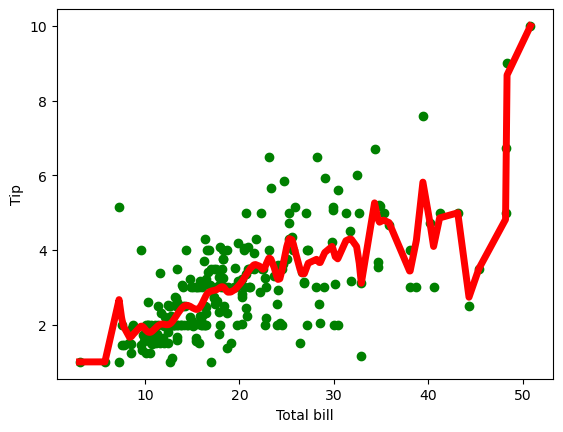

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point, xmat, ymat, k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
     
def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
       
# load data points
data = pd.read_csv('tips.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)
 
#preparing and add 1 in bill
mbill = np.mat(bill)
mtip = np.mat(tip)

m= np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T))

#set k here
ypred = localWeightRegression(X,mtip,0.5)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='green')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()